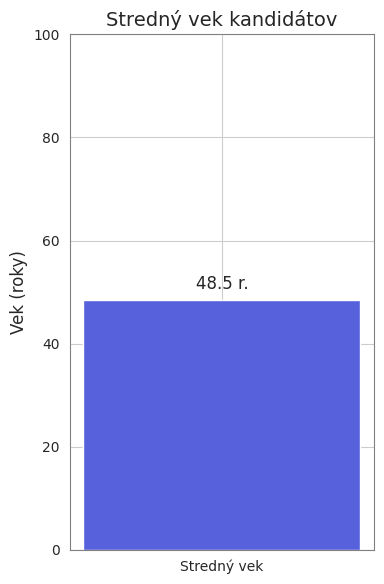

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítanie dát
data = pd.read_csv('data/NRSR2023_SK_tab0d.csv')
stredny_vek = round(data['Priemerný vek'].mean(), 1)

# Vykreslenie jednoduchého stĺpca
plt.figure(figsize=(4, 6))
plt.bar(["Stredný vek"], [stredny_vek], color="#5661DB")
plt.ylim(0, 100)
plt.ylabel("Vek (roky)")
plt.title("Stredný vek kandidátov")
plt.text(0, stredny_vek + 2, f"{stredny_vek} r.", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


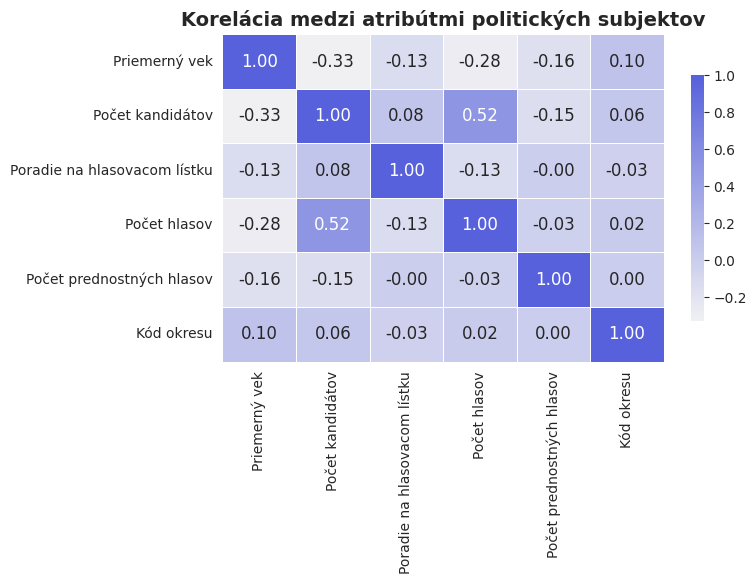

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Štýlové nastavenia aplikácie
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "axes.edgecolor": "gray",
    "axes.linewidth": 0.8
})

# Načítanie dát
data_vek = pd.read_csv('data/NRSR2023_SK_tab0d.csv')
data_hlasy = pd.read_csv('data/NRSR2023_SK_tab03a.csv') 
data_poslanci = pd.read_csv('data/NRSR2023_SK_tab06.csv')
data_pr_hlasy = pd.read_csv('data/NRSR2023_SK_tab07a.csv')
data_geo = pd.read_csv('data/NRSR2023_SK_tab0c.csv')

# Vytvorenie dátového rámca
df = pd.DataFrame({
    'Priemerný vek': data_vek['Priemerný vek'],
    'Počet kandidátov': data_vek['Počet kandidátov'],
    'Poradie na hlasovacom lístku': data_poslanci['Poradie na hlasovacom lístku'],
    'Počet hlasov': data_hlasy['Počet platných hlasov'],   
    'Počet prednostných hlasov': data_pr_hlasy['Počet platných prednostných hlasov'],
    'Kód okresu': data_geo['Kód okresu'],
})

# Korelačná matica
correlation_matrix = df.corr(numeric_only=True)

# Vykreslenie heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap=sns.light_palette("#5661DB", as_cmap=True),  # Tvoja hlavná modrá
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.75}
)
plt.title('Korelácia medzi atribútmi politických subjektov', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


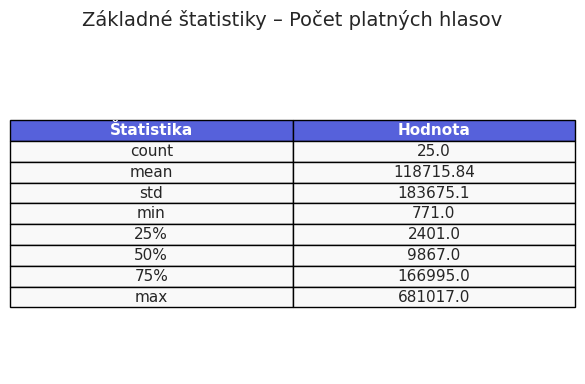

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Jednotný štýl RRZ
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.edgecolor": "gray",
    "axes.linewidth": 0.8
})

# Načítanie údajov
data = pd.read_csv('data/NRSR2023_SK_tab03a.csv')
df = pd.DataFrame(data)

# Výpočet základných štatistík
statistiky = df["Počet platných hlasov"].describe().round(2)
stat_df = statistiky.reset_index()
stat_df.columns = ['Štatistika', 'Hodnota']

# Vizualizácia tabuľky
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')

# Tabuľka
table = ax.table(
    cellText=stat_df.values,
    colLabels=stat_df.columns,
    cellLoc='center',
    loc='center',
    colColours=["#5661DB", "#5661DB"]
)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.2)

# Zvýraznenie hlavičky
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#5661DB')
    else:
        cell.set_facecolor('#f9f9f9')

# Nadpis
plt.title("Základné štatistiky – Počet platných hlasov", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


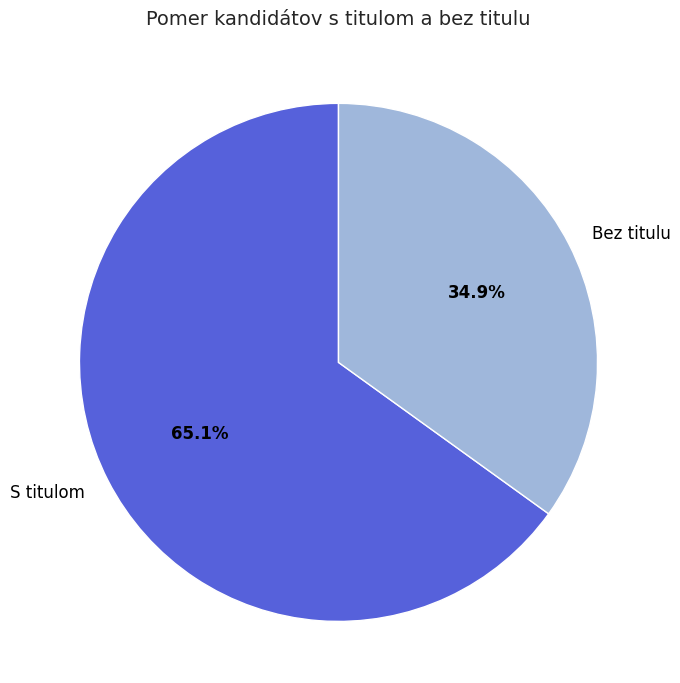

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Štýlové nastavenia
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.edgecolor": "gray",
    "axes.linewidth": 0.8
})

# Načítanie dát
candidates_df = pd.read_csv('data/NRSR2023_SK_tab0b.csv')

# Pridanie kategórie titulov
candidates_df['Titul'] = candidates_df['Titul'].apply(lambda x: 'S titulom' if pd.notna(x) else 'Bez titulu')
title_counts = candidates_df['Titul'].value_counts()

# Koláčový graf
fig, ax = plt.subplots(figsize=(7, 7))
colors = ['#5661DB', '#9FB7DB']  # decentná modrá + svetlá modrá

wedges, texts, autotexts = ax.pie(
    title_counts,
    labels=title_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'color': "black"}
)

# Formátovanie
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=12)
ax.axis('equal')  # zabezpečí kruhový tvar
plt.title('Pomer kandidátov s titulom a bez titulu', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


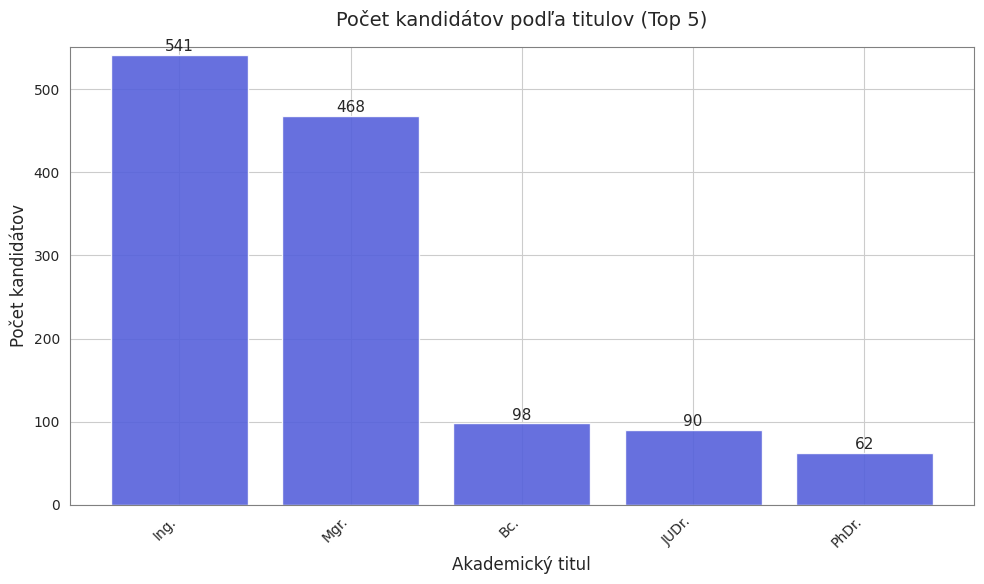

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Štýlové nastavenia
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.edgecolor": "gray",
    "axes.linewidth": 0.8
})

# Načítanie dát
candidates_df = pd.read_csv('data/NRSR2023_SK_tab0b.csv')

# Najčastejšie akademické tituly
top_titles = candidates_df['Titul'].value_counts().nlargest(5)

# Vizuálne nastavenie
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_titles.index, top_titles.values, color='#5661DB', alpha=0.9)

# Popisy grafu
ax.set_title('Počet kandidátov podľa titulov (Top 5)', fontsize=14, pad=15)
ax.set_xlabel('Akademický titul')
ax.set_ylabel('Počet kandidátov')
ax.set_ylim(0, top_titles.max() + 10)

# Otočenie popisov na x-osi
plt.xticks(rotation=45, ha='right')

# Pridanie hodnôt nad stĺpce
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


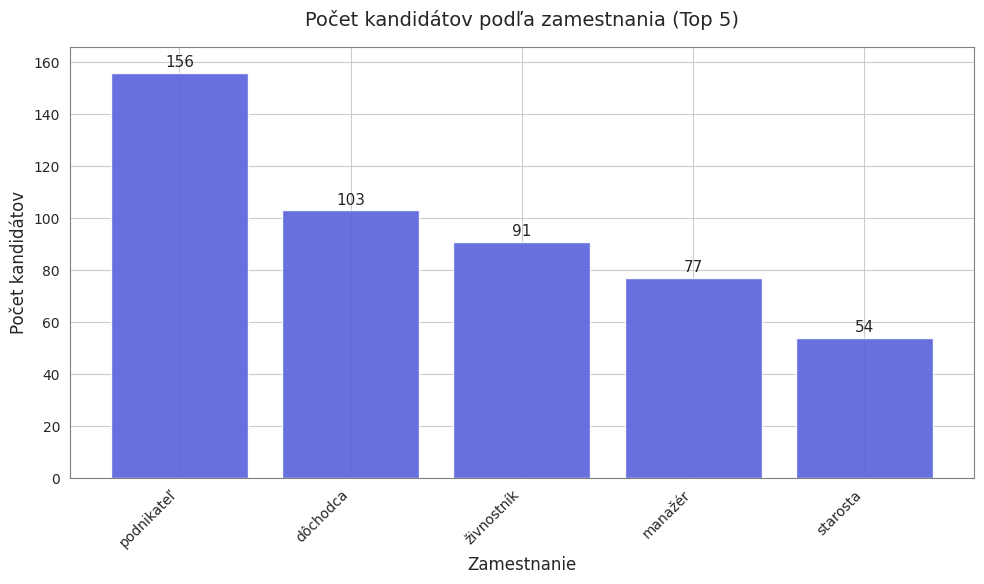

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Štýlové nastavenia
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.edgecolor": "gray",
    "axes.linewidth": 0.8
})

# Načítanie dát
candidates_df = pd.read_csv('data/NRSR2023_SK_tab0b.csv')

# Najčastejšie zamestnania
top_jobs = candidates_df['Zamestnanie'].value_counts().nlargest(5)

# Vizualizácia
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_jobs.index, top_jobs.values, color='#5661DB', alpha=0.9)

# Titulok a popisy
ax.set_title('Počet kandidátov podľa zamestnania (Top 5)', fontsize=14, pad=15)
ax.set_xlabel('Zamestnanie')
ax.set_ylabel('Počet kandidátov')
ax.set_ylim(0, top_jobs.max() + 10)

# Rotácia textu na osi X
plt.xticks(rotation=45, ha='right')

# Hodnoty nad stĺpcami
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


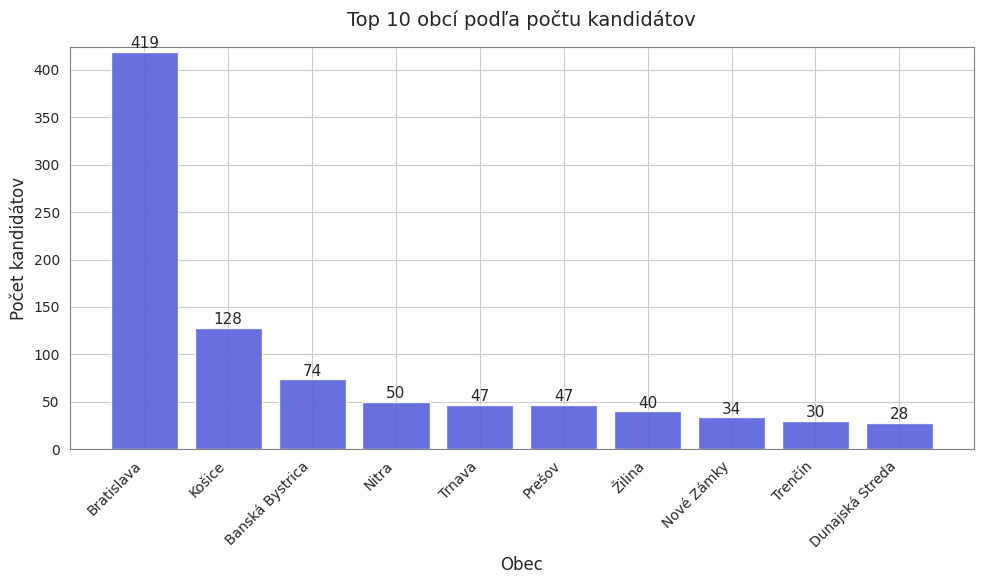

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Štýlové nastavenia
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.edgecolor": "gray",
    "axes.linewidth": 0.8
})

# Načítanie dát
candidates_df = pd.read_csv('data/NRSR2023_SK_tab0b.csv')

# Počet kandidátov podľa obcí
municipality_counts = candidates_df['Obec trvalého pobytu'].value_counts()
top_municipalities = municipality_counts.nlargest(10)

# Vizualizácia
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_municipalities.index, top_municipalities.values, color='#5661DB', alpha=0.9)

# Popisy
ax.set_title('Top 10 obcí podľa počtu kandidátov', fontsize=14, pad=15)
ax.set_xlabel('Obec')
ax.set_ylabel('Počet kandidátov')
ax.set_ylim(0, top_municipalities.max() + 5)

# Otočenie popisov
plt.xticks(rotation=45, ha='right')

# Hodnoty nad stĺpcami
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


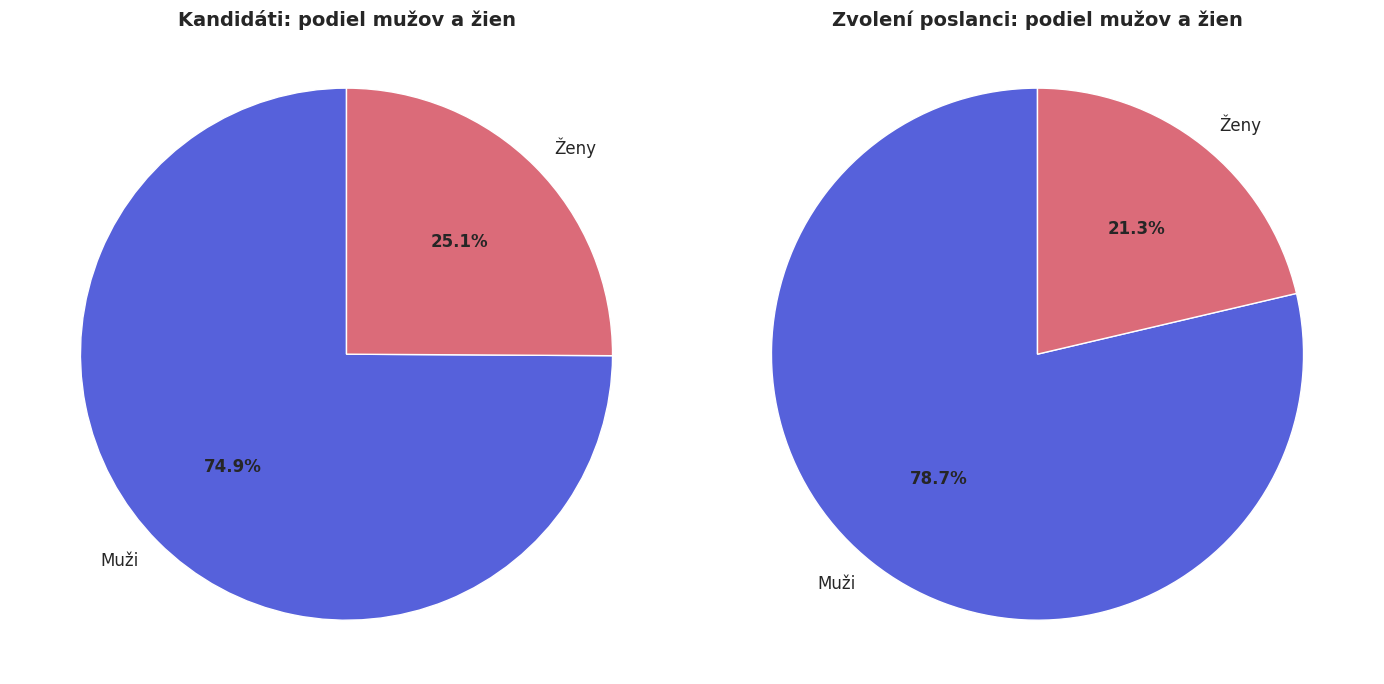

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítanie dát
candidates_df = pd.read_csv('data/NRSR2023_SK_tab0b.csv')
elected_df = pd.read_csv('data/NRSR2023_SK_tab06.csv')

# Funkcia na odhad pohlavia
def estimate_gender(name):
    return 'Žena' if isinstance(name, str) and name.endswith('a') else 'Muž'

# Pridanie stĺpca s pohlavím
candidates_df['Pohlavie'] = candidates_df['Meno'].apply(estimate_gender)
elected_df['Pohlavie'] = elected_df['Meno'].apply(estimate_gender)

# Spočítanie podľa pohlavia
gender_counts_candidates = candidates_df['Pohlavie'].value_counts().reindex(['Muž', 'Žena'])
gender_counts_elected = elected_df['Pohlavie'].value_counts().reindex(['Muž', 'Žena'])

# Farby
colors = ['#5661DB', '#DB6B79']  # muž – modrá, žena – ružová

# Vizualizácia
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

def add_pie(ax, counts, title):
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=['Muži', 'Ženy'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        textprops={'fontsize': 12}
    )
    # Nastavenie tučných percent
    for autotext in autotexts:
        autotext.set_fontweight('bold')

    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('equal')  

# Kandidáti
add_pie(axes[0], gender_counts_candidates, 'Kandidáti: podiel mužov a žien')

# Zvolení
add_pie(axes[1], gender_counts_elected, 'Zvolení poslanci: podiel mužov a žien')

plt.tight_layout()
plt.show()


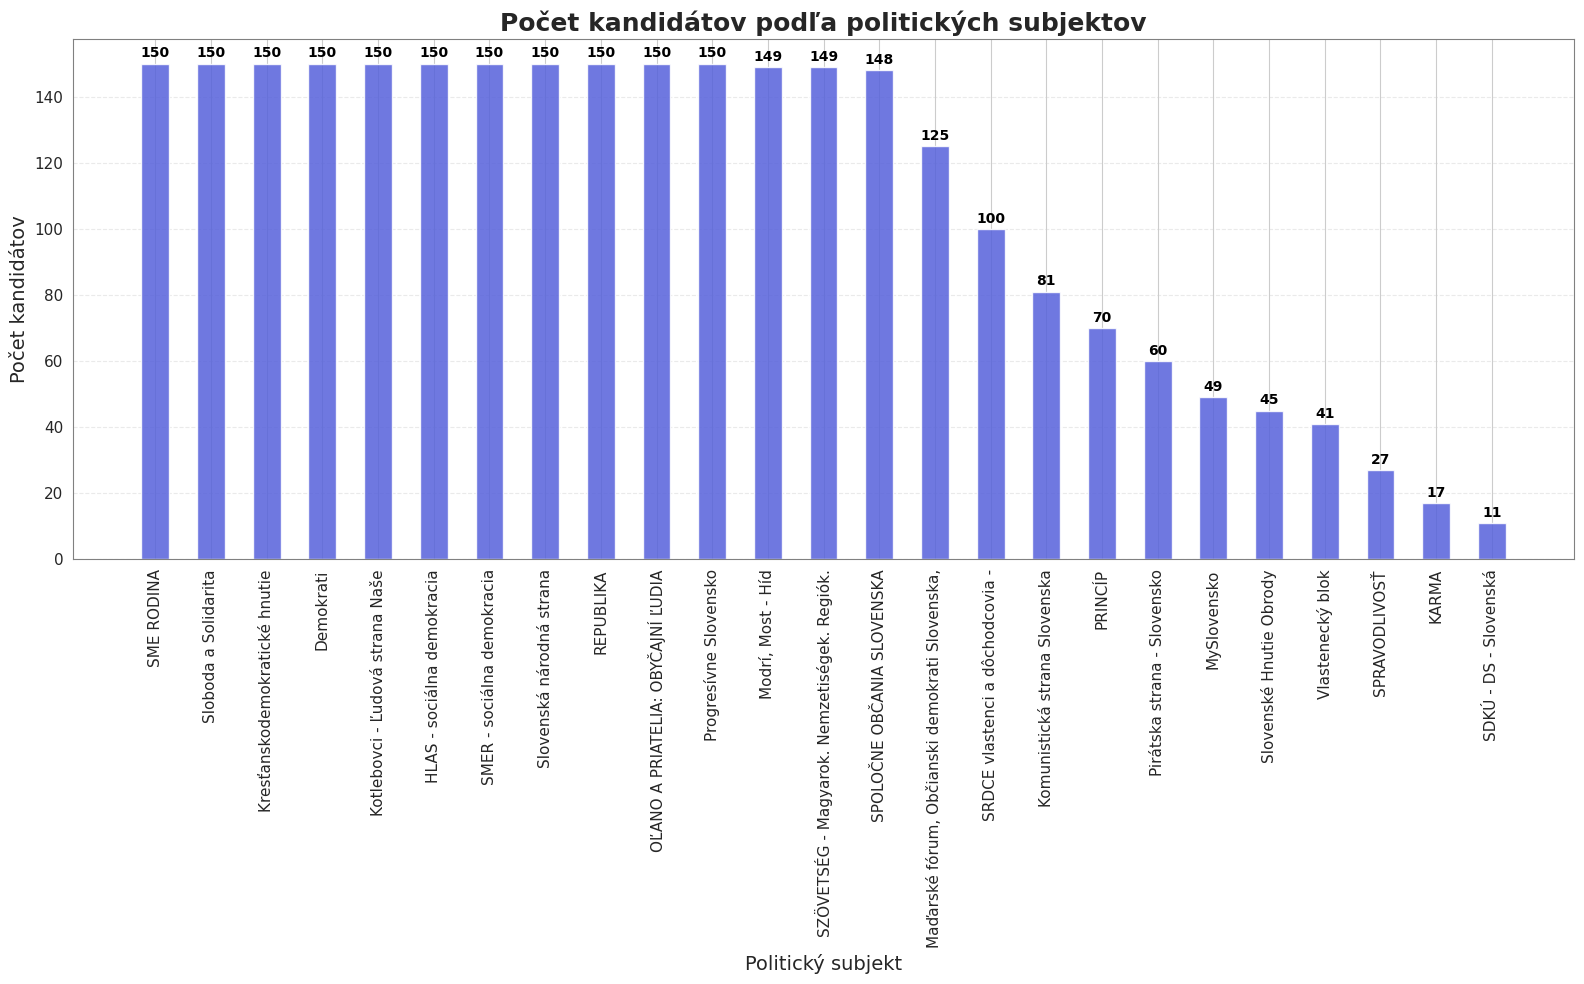

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Načítanie dát
df = pd.read_csv('data/NRSR2023_SK_tab0d.csv')  # Súbor s údajmi

# Skrátenie názvov politických subjektov na prvých 5 slov
df['Názov politického subjektu'] = df['Názov politického subjektu'].apply(lambda x: ' '.join(x.split()[:5]))

# Zoradenie podľa počtu kandidátov
df_sorted = df.sort_values(by='Počet kandidátov', ascending=False)

# Vizuálny štýl
plt.figure(figsize=(16, 10))
bars = plt.bar(df_sorted['Názov politického subjektu'], df_sorted['Počet kandidátov'],
               color='#5661DB', alpha=0.85, width=0.5)  # Zjednotená farba

# Pridanie hodnôt nad stĺpce
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Štýlové nastavenia
plt.title('Počet kandidátov podľa politických subjektov', fontsize=18, fontweight='bold')
plt.xlabel('Politický subjekt', fontsize=14)
plt.ylabel('Počet kandidátov', fontsize=14)
plt.xticks(rotation=90, ha='center', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()

# Zobrazenie grafu
plt.show()
